In [1]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install h5netcdf 

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install cmcrameri

  Using cached cmcrameri-1.9-py3-none-any.whl.metadata (4.6 kB)
Using cached cmcrameri-1.9-py3-none-any.whl (277 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
# Importamos librerìas que vamos a usar
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import math
from cmcrameri import cm

In [7]:
# Función para mapear contourf con contour
def contour(data,contourdata,levels=np.arange(0,11),ccmap='PuBu',extend='max',limite_NS=42,clevels=np.arange(230,300,15),titulo='OLR y pr',cbarlabel='pr  [mm day$^{-1}$]'):
    lons,lats=data.lon,data.lat
    data, lon = add_cyclic_point(data, coord=lons)
    contourdata, lon = add_cyclic_point(contourdata, coord=lons)
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.Robinson())
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    cs=ax.contourf(lon,lats,data,levels=levels,cmap=ccmap,extend=extend,transform=ccrs.PlateCarree(),alpha=0.9)
    cc=ax.contour(lon,lats,contourdata,levels=clevels,colors='k',transform=ccrs.PlateCarree())
    ax.clabel(cc, cc.levels, inline=True, fontsize=10)
    ax.set_extent([-180,180, -limite_NS, limite_NS], crs=ccrs.PlateCarree())
    gl=ax.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = True
    gl.xlabel_style = {'size': 13}
    gl.ylabel_style = {'size': 13}
    plt.title(titulo,fontsize=13)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)
    cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.046, pad=0.06)
    cbar.ax.set_xlabel(cbarlabel)

Para este análisis se hará la diferencia del viento zonal durante la temporada invernal entre la altura de 200 hPa y 850 hPa, tanto con los datos históricos como los del escenario con ssp585

### **<font color="Purple"> Datos históricos </font>**

In [8]:
# Leer los archivos de viento 
u_filename='ua_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_195001-201412.nc'
v_filename='va_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_195001-201412.nc'

In [9]:
# Abrir archivos y seleccionar variables a usar 
u_ds=xr.open_dataset(u_filename)
ua=u_ds['ua']  #viento zonal
plevu=u_ds['plev'] #presiones
v_ds=xr.open_dataset(v_filename)
va=v_ds['va']
plevv=v_ds['plev']

In [10]:
#Seleccionar solo 200 hPa y de 1979 a 2014
ua200hPa = ua.sel(plev=20000).where(ua.time.dt.year >= 1979, drop=True)
va200hPa = va.sel(plev=20000).where(va.time.dt.year >= 1979, drop=True)

In [13]:
anualU = ua200hPa.groupby(ua200hPa.time.dt.year).mean(dim='time')
anualV = va200hPa.groupby(va200hPa.time.dt.year).mean(dim='time')

In [14]:
MAG = np.sqrt(anualU**2 + anualV**2)
MAG

<xarray.DataArray (year: 36, lat: 145, lon: 192)> Size: 4MB
array([[[2.7647572 , 2.7647393 , 2.7647805 , ..., 2.7647338 ,
         2.7647586 , 2.7647536 ],
        [2.9797392 , 2.9434047 , 2.9069238 , ..., 3.0868087 ,
         3.0512545 , 3.0156047 ],
        [3.1924727 , 3.1219    , 3.051125  , ..., 3.4014552 ,
         3.332312  , 3.2626994 ],
        ...,
        [2.9781382 , 2.9671378 , 2.9548337 , ..., 3.0036602 ,
         2.996432  , 2.9878945 ],
        [2.2270308 , 2.2206628 , 2.2134886 , ..., 2.2416584 ,
         2.237498  , 2.2325518 ],
        [1.5344576 , 1.5344598 , 1.5344813 , ..., 1.5344598 ,
         1.5344663 , 1.5344778 ]],

       [[4.2688766 , 4.2689433 , 4.2689085 , ..., 4.2689056 ,
         4.268897  , 4.2689176 ],
        [4.1964126 , 4.169912  , 4.1438503 , ..., 4.277216  ,
         4.2500954 , 4.223164  ],
        [4.085485  , 4.0289345 , 3.9727535 , ..., 4.2547727 ,
         4.198614  , 4.142159  ],
...
        [2.973753  , 2.9757814 , 2.9760075 , ..., 2.9573882 ,
         2.9645882 , 2.970061  ],
        [2.1862295 , 2.187123  , 2.1873703 , ..., 2.178917  ,
         2.1821196 , 2.1845386 ],
        [1.6010065 , 1.601017  , 1.6010484 , ..., 1.6010568 ,
         1.6010134 , 1.601022  ]],

       [[2.7056942 , 2.7056932 , 2.705705  , ..., 2.7056842 ,
         2.7056997 , 2.705751  ],
        [2.7333753 , 2.7360015 , 2.7388594 , ..., 2.7270093 ,
         2.728887  , 2.730978  ],
        [2.573272  , 2.5735455 , 2.5747886 , ..., 2.5786457 ,
         2.5759475 , 2.5741553 ],
        ...,
        [2.5891669 , 2.5906441 , 2.5904477 , ..., 2.573893  ,
         2.5808828 , 2.5859354 ],
        [1.9985747 , 2.0034785 , 2.0077798 , ..., 1.9803439 ,
         1.987033  , 1.9930868 ],
        [1.8042188 , 1.8041945 , 1.804216  , ..., 1.8042376 ,
         1.8041952 , 1.8042233 ]]], dtype=float32)
Coordinates:
    plev     float64 8B 2e+04
  * lat      (lat) float64 1kB -90.0 -88.75 -87.5 -86.25 ... 87.5 88.75 90.0
  * lon      (lon) float64 2kB 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * year     (year) int64 288B 1979 1980 1981 1982 1983 ... 2011 2012 2013 2014

In [12]:
# Calcular climatología estacional de u,v y seleccionar DJF (invierno) a 200 hPa
ua_estacion200=ua200hPa.groupby(ua200hPa.time.dt.season).mean(dim='time') 
ua_DJF200 = ua_estacion200[0]
va_estacion200=va200hPa.groupby(va200hPa.time.dt.season).mean(dim='time') 
va_DJF200= va_estacion200[0]

In [13]:
#magnitud de vector con componentes u,v a 200 hPa
magnitudDJF200 = np.sqrt(ua_DJF200**2 + va_DJF200**2)

In [14]:
#Seleccionar solo 850 hPa y de 1979 a 2014
ua850hPa = ua.sel(plev=85000).where(ua.time.dt.year >= 1979, drop=True)
va850hPa = va.sel(plev=85000).where(va.time.dt.year >= 1979, drop=True)

In [15]:
# Calcular climatología estacional de u,v y seleccionar DJF (invierno) a 850 hPa
ua_estacion850=ua850hPa.groupby(ua850hPa.time.dt.season).mean(dim='time') 
ua_DJF850 = ua_estacion850[0]
va_estacion850=va850hPa.groupby(va850hPa.time.dt.season).mean(dim='time') 
va_DJF850 = va_estacion850[0]

In [16]:
#magnitud de vector con componentes u,v a 850 hPa
magnitudDJF850 = np.sqrt(ua_DJF850**2 + va_DJF850**2)

### **<font color="Purple"> Datos simulados ssp585 </font>**

In [17]:
# Leer archivo ssp585
u_filename585 = 'ua_Amon_HadGEM3-GC31-LL_ssp585_r1i1p1f3_gn_205001-210012.nc'
v_filename585='va_Amon_HadGEM3-GC31-LL_ssp585_r1i1p1f3_gn_205001-210012.nc'

In [18]:
# Seleccionar variables del archivo ssp585
u_ds585=xr.open_dataset(u_filename585)
ua585=u_ds585['ua']
v_ds585=xr.open_dataset(v_filename585)
va585=v_ds585['va']

In [19]:
#ua_585=ua585.where(ua585.time.dt.year>2069) #solo periodo de 2070 a 2100
#Seleccionar solo el nivel de 200 hPa
ua2070 = ua585.sel(plev=20000).where(ua585.time.dt.year >= 2070, drop=True)
va2070 = va585.sel(plev=20000).where(va585.time.dt.year >= 2070, drop=True)

In [20]:
# Calcular promedio estacional y selecionar DJF a 200 hPa
ua_585_estacion=ua2070.groupby(ua2070.time.dt.season).mean(dim='time') 
ua_585_DJF = ua_585_estacion[0]
va_585_estacion=va2070.groupby(va2070.time.dt.season).mean(dim='time') 
va_585_DJF = va_585_estacion[0]

In [21]:
#magnitud de vector con componentes u,v
magnitud585 = np.sqrt(ua_585_DJF**2 + va_585_DJF**2)

In [22]:
#Seleccionar solo el nivel de 850 hPa
uas850 = ua585.sel(plev=85000).where(ua585.time.dt.year >= 2070, drop=True)
vas850 = va585.sel(plev=85000).where(va585.time.dt.year >= 2070, drop=True)

In [23]:
# Calcular promedio estacional y selecionar DJF a 850 hPa
uas_850_estacion=uas850.groupby(uas850.time.dt.season).mean(dim='time') 
uas_850_DJF = uas_850_estacion[0]
vas_850_estacion=vas850.groupby(vas850.time.dt.season).mean(dim='time') 
vas_850_DJF = vas_850_estacion[0]

In [24]:
#magnitud de vector con componentes u,v
magnituds850 = np.sqrt(uas_850_DJF**2 + vas_850_DJF**2)

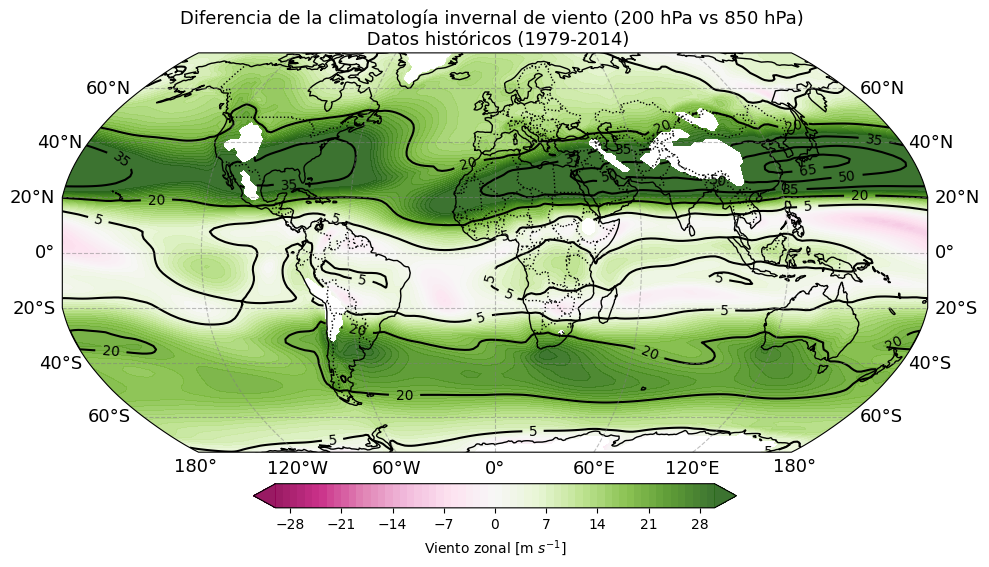

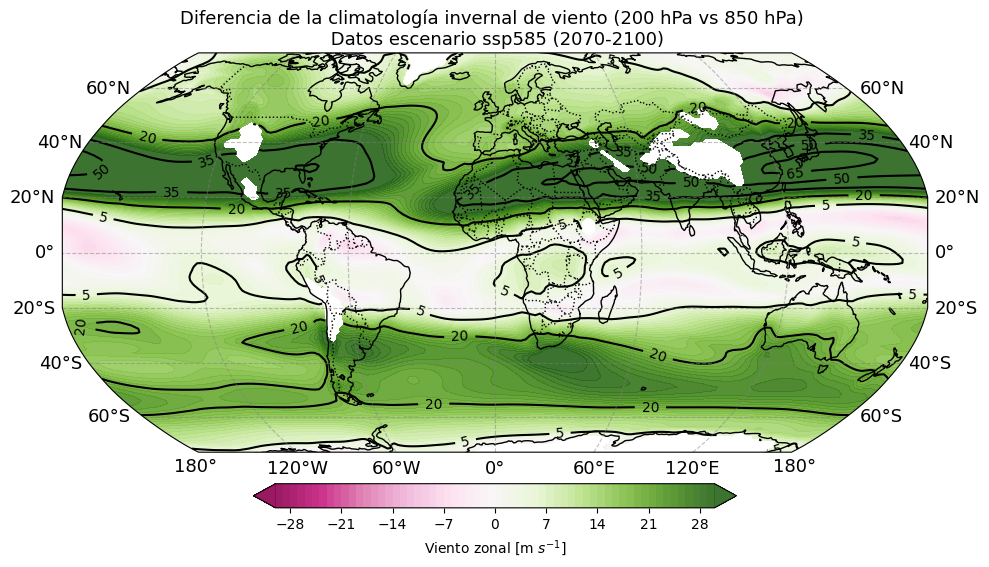

In [26]:
# Mapear diferencia de la climatología invernal de viento a 200 hPa y 850 hPa histórico
contour(magnitudDJF200-magnitudDJF850,magnitudDJF200-magnitudDJF850,levels=np.arange(-30,30.1),ccmap='PiYG',extend='both',limite_NS=75,clevels=np.arange(5,75,15),
         titulo='Diferencia de la climatología invernal de viento (200 hPa vs 850 hPa) \n Datos históricos (1979-2014)',cbarlabel='Viento zonal [m $s^{-1}$]')
plt.savefig('ssp585_200hPahistorico.png', dpi=300, bbox_inches='tight')
# Mapear diferencia de la climatología invernal de viento a 200 hPa y 850 hPa esscenario ssp585
contour(magnitud585-magnituds850,magnitud585-magnituds850,levels=np.arange(-30,30.1),ccmap='PiYG',extend='both',limite_NS=75,clevels=np.arange(5,75,15),
         titulo='Diferencia de la climatología invernal de viento (200 hPa vs 850 hPa) \n Datos escenario ssp585 (2070-2100)',cbarlabel='Viento zonal [m $s^{-1}$]')
plt.savefig('ssp585_200hPas.png', dpi=300, bbox_inches='tight')